1. Derive the gradient expression for logistic regression with regularization. (Upload the photo)

2. Perform  polynomial regression of degree 3 on the given train dataset. Predict the mean square error for the test data set with the obtained model (use constant learning rate) also print the final weights.

   a)Without regularization

   b)With regularization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data=pd.read_csv(r'C:\\Users\\MANOJ PATEL\\Downloads\\Train_dataset.csv')

In [3]:
train_data

,x,y
0,-10.000000,-1766.000000
1,-9.899497,-1710.603914
2,-9.798995,-1656.367334
3,-9.698492,-1603.278077
4,-9.597990,-1551.323963
...,...,...
195,9.597990,1927.809608
196,9.698492,1987.521102
197,9.798995,2048.448544
198,9.899497,2110.604116


In [4]:
x=train_data['x']
x_1=x/max(abs(x))
y1=train_data['y']
y=y1/max(abs(y1))
x_2=x_1*x_1
x_3=x_2*x_1

In [5]:
print(max(x_1),min(x_1))
print(max(y),max(abs(y)))

1.0 -1.0
1.0 1.0


In [6]:
X_features=[[1 for i in range(len(y))],x_1,x_2,x_3]
def J(w):    # Objective Function
    s=0
    for i in range(len(y)):
        p=0
        for j in range(len(w)):
            p+=w[j]*X_features[j][i]
        s+=(p-y[i])**2
    return s/(2*len(y))
def gradJ(w):
    gr=[]
    for j in range(len(w)):
        s=0       
        for i in range(len(y)):
            p=0
            for k in range(len(w)):
                p+=w[k]*X_features[k][i]
            s+=((p-y[i])*X_features[j][i])
        gr.append(s/len(y))
    return np.array(gr)

In [7]:
#This is the function used in the last LAB Here alpha is fixed
def SteepestDescent(f,gradf,initialGuess=np.array([0,1/2,1/3,1/2]),iterations=500,tolerance=10**-3,StepL=0.01):
    k=0
    w_0=initialGuess
    while k<iterations and np.linalg.norm(gradf(w_0))>tolerance:
        p=-gradf(w_0)
        w_0=w_0+StepL*p
        k=k+1
    print('minimum value will be:',f(w_0),'at',w_0,'Number of iterations:',k)
    return w_0,f(w_0)
 

In [8]:
w,value=SteepestDescent(J,gradJ)

minimum value will be: 0.0038697548347107545 at [-0.05008086  0.31456902  0.23459283  0.44253631] Number of iterations: 500


In [9]:
x_1=train_data['x']
y=train_data['y']
x_2=x_1*x_1
x_3=x_2*x_1

In [10]:
print("SME will be ",J(w))

SME will be  286394.7180094428


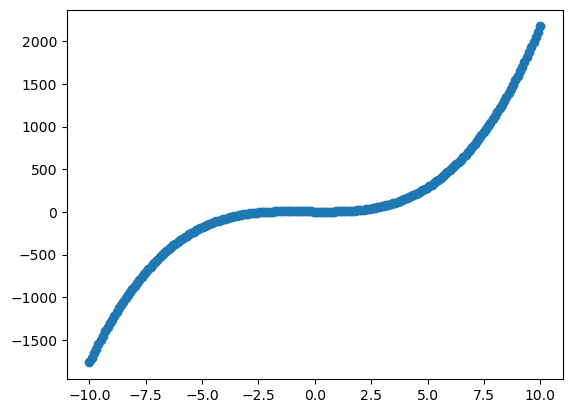

In [11]:
plt.scatter(x_1,y)

In [17]:
#defining the regression model 
def model1(x):
    return (w[0]+w[1]*x+w[2]*x**2+w[3]*x**3)
def model2(x):
    return 1.767*x**3

In [18]:
results=pd.DataFrame({ 'Actual':test_data['y'],'Predicted':model2(test_data['x'])})
print(results)

         Actual    Predicted
0  -1767.898729 -1767.000000
1  -1496.271751 -1508.856370
2  -1254.183644 -1277.164568
3  -1040.888009 -1070.494766
4   -849.077111  -887.417134
5   -686.262692  -726.501846
6   -545.224138  -586.319071
7   -419.853904  -465.438982
8   -321.444054  -362.431750
9   -233.948414  -275.867547
10  -164.786088  -204.316543
11  -111.769920  -146.348910
12   -68.532441  -100.534820
13   -40.147304   -65.444444
14   -13.688711   -39.647954
15    -1.099846   -21.715521
16     5.403204   -10.217317
17     5.166884    -3.723512
18     7.308543    -0.804279
19     6.394550    -0.029788
20     2.942306     0.029788
21     3.416502     0.804279
22     7.987157     3.723512
23    14.781894    10.217317
24    34.732564    21.715521
25    55.418389    39.647954
26    90.316976    65.444444
27   134.487090   100.534820
28   194.060926   146.348910
29   268.850285   204.316543
30   357.286137   275.867547
31   467.019593   362.431750
32   595.838508   465.438982
33   744.00910

In [13]:
test_data=pd.read_csv(r'C:\\Users\\MANOJ PATEL\\Downloads\\Test_dataset.csv')
test_data

,x,y
0,-10.000000,-1767.898729
1,-9.487179,-1496.271751
2,-8.974359,-1254.183644
3,-8.461538,-1040.888009
4,-7.948718,-849.077111
5,-7.435897,-686.262692
6,-6.923077,-545.224138
7,-6.410256,-419.853904
8,-5.897436,-321.444054
9,-5.384615,-233.948414


In [14]:
results=pd.DataFrame({ 'Actual':test_data['y'],'Predicted':model1(test_data['x'])})
print(results)

         Actual   Predicted
0  -1767.898729 -422.272800
1  -1496.271751 -359.805087
2  -1254.183644 -303.838714
3  -1040.888009 -254.015587
4   -849.077111 -209.977612
5   -686.262692 -171.366697
6   -545.224138 -137.824747
7   -419.853904 -108.993669
8   -321.444054  -84.515371
9   -233.948414  -64.031757
10  -164.786088  -47.184736
11  -111.769920  -33.616214
12   -68.532441  -22.968096
13   -40.147304  -14.882291
14   -13.688711   -9.000704
15    -1.099846   -4.965242
16     5.403204   -2.417812
17     5.166884   -1.000320
18     7.308543   -0.354672
19     6.394550   -0.122776
20     2.942306    0.053462
21     3.416502    0.532135
22     7.987157    1.671337
23    14.781894    3.829162
24    34.732564    7.363702
25    55.418389   12.633051
26    90.316976   19.995303
27   134.487090   29.808551
28   194.060926   42.430888
29   268.850285   58.220408
30   357.286137   77.535203
31   467.019593  100.733369
32   595.838508  128.172997
33   744.009102  160.212182
34   912.633868  197

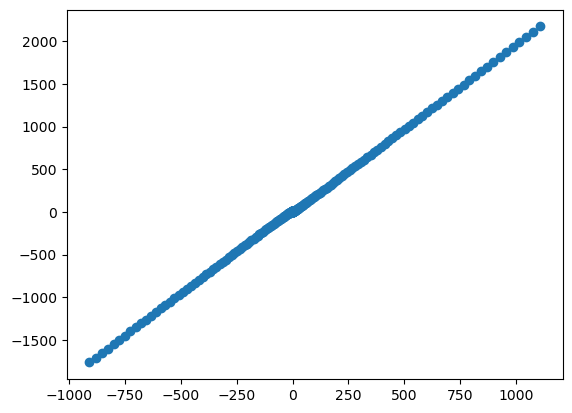

In [70]:
#plt.scatter(x_1,y)
plt.scatter(x_1+x_1**2+x_1**3,y)
#plt.scatter(x_1**3,y)

In [19]:
X_features=[[1 for i in range(len(y))],x_1,x_2,x_3]
def JR(w,ReguPara):    # Objective Function
    s=0
    w_1=w[1:]
    regularization=ReguPara*sum(w_1*w_1)
    for i in range(len(y)):
        p=0
        for j in range(len(w)):
            p+=w[j]*X_features[j][i]
        s+=(p-y[i])**2
    return (s+regularization)/(2*len(y))
def gradJR(w,ReguPara):
    gr=[]
    for j in range(len(w)):
        s=0       
        for i in range(len(y)):
            p=0
            for k in range(len(w)):
                p+=w[k]*X_features[k][i]
            s+=((p-y[i])*X_features[j][i])
        gr.append((s+ReguPara*w[j])/len(y))
    return np.array(gr)

In [20]:
#This is the function used in the last LAB Here alpha is fixed
def SteepestDescent(f,gradf,initialGuess=np.array([0,1/2,1/3,1/2]),iterations=1000,tolerance=10**-3,StepL=0.01,ReguPara=0.1):
    k=0
    w_0=initialGuess
    while k<iterations and np.linalg.norm(gradf(w_0,ReguPara))>tolerance:
        p=-gradf(w_0,ReguPara)
        w_0=w_0+StepL*p
        k=k+1
    print('minimum value will be:',f(w_0,ReguPara),'at',w_0,'Number of iterations:',k)
    return w_0,f(w_0,ReguPara)

In [23]:

w,value=SteepestDescent(JR,gradJR)

minimum value will be: inf at [1.21774798e+285 8.76600571e+301 2.76711809e+287 6.32370864e+303] Number of iterations: 96


C:\Users\MANOJ PATEL\AppData\Local\Temp\ipykernel_15436\2012465735.py:20: RuntimeWarning: overflow encountered in double_scalars
  s+=((p-y[i])*X_features[j][i])
C:\Users\MANOJ PATEL\AppData\Local\Temp\ipykernel_15436\2012465735.py:20: RuntimeWarning: invalid value encountered in double_scalars
  s+=((p-y[i])*X_features[j][i])
C:\Users\MANOJ PATEL\AppData\Local\Temp\ipykernel_15436\2012465735.py:5: RuntimeWarning: overflow encountered in multiply
  regularization=ReguPara*sum(w_1*w_1)
C:\Users\MANOJ PATEL\AppData\Local\Temp\ipykernel_15436\2012465735.py:10: RuntimeWarning: overflow encountered in double_scalars
  s+=(p-y[i])**2


In [13]:
x_1=train_data['x']
y=train_data['y']
x_2=x_1*x_1
x_3=x_2*x_1

In [16]:
print("SME will be ",JR(w,0.1))

SME will be  286403.27648517326


In [17]:
def model2(x):
    return (w[0]+w[1]*x+w[2]*x**2+w[3]*x**3)

In [18]:
results=pd.DataFrame({ 'Actual':test_data['y'],'Predicted':model2(test_data['x'])})
print(results)

         Actual   Predicted
0  -1767.898729 -455.632679
1  -1496.271751 -388.472891
2  -1254.183644 -328.273362
3  -1040.888009 -274.652562
4   -849.077111 -227.228961
5   -686.262692 -185.621031
6   -545.224138 -149.447241
7   -419.853904 -118.326062
8   -321.444054  -91.875963
9   -233.948414  -69.715416
10  -164.786088  -51.462890
11  -111.769920  -36.736856
12   -68.532441  -25.155783
13   -40.147304  -16.338143
14   -13.688711   -9.902406
15    -1.099846   -5.467041
16     5.403204   -2.650520
17     5.166884   -1.071312
18     7.308543   -0.347888
19     6.394550   -0.098718
20     2.942306    0.057728
21     3.416502    0.502979
22     7.987157    1.618566
23    14.781894    3.786017
24    34.732564    7.386863
25    55.418389   12.802633
26    90.316976   20.414856
27   134.487090   30.605064
28   194.060926   43.754785
29   268.850285   60.245549
30   357.286137   80.458886
31   467.019593  104.776325
32   595.838508  133.579396
33   744.009102  167.249630
34   912.633868  206